# Рекуррентные нейронные сети RNN

##  RNN 

Если стандартные методы машинного обучения работают с так называемыми структурированными типами данных, с объектами, у которых фиксировано признаковое описание, которые подаются на вход моделям, то рекуррентные нейронные сети используются с неструктурированными данными. Например, в распознавании речи, генерации музыки, машинном переводе, а также в задаче выделения именованных сущностей, о которых мы поговорим более подробно в следующем видео. Данные в таких задачах представляют собой текст без предобработки, звуковой ряд и другие данные, не имеющие признаковых описаний. Давайте обсудим, каков принцип работы нейронной сети, и как именно таким нейронным сетям удается работать с неструктурированными данными.

Мы имеем возможность сохранять информацию, сформированную при обработке одного слова, и использовать ее, когда мы анализируем дальнейшие слова. Видно, что при рассмотрении каждого слова происходят одни и те же процедуры. Нейронная сеть получает очередное слово, учитывает предыдущую активацию, формирует ответ. Это действие, происходящее в рамках одной ячейки нейронной сети. Так как вся сеть представляет собой объединение однотипных ячеек, то нейронная сеть называется рекуррентной. Рекуррентные нейронные сети не ограничиваются случаем, когда мы каждому входу нейронной сети должны сопоставить некоторый ответ, после чего анализировать следующий вход.

<img src ="http://edunet.kea.su/repo/src/L01_Intro/img/mp/types3.png"  width="700">

### Типы задач

**Анализ временных рядов**
* Табличные данные
* Аннотирование изображений и видео (Image/Video captioning)
* Машинный перевод
* Распознавание текста
* Распознавание речи

**Генеративные модели**
* Генерация текста/речи (чат - боты)
* Генерация изображений

**Классификация**
* Изображения
* Блоки текста (Sentiment analysis)

Большинство этих задачь подрузамевают наличие контекста ...

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-011.png" width="700">

Существует множество типов рекуррентных нейронных сетей. Простейший случай рекуррентной сети — «one to one», когда у нас есть всего один вход и один выход нейронной сети. Более сложной является реализация «one to many», когда у нас есть всего один вход и нам необходимо сформировать несколько выходов. Такой тип нейронной сети актуален, когда мы говорим о генерации музыки или текстов. Мы задаем начальное слово или начальный звук, а дальше модель начинает самостоятельно генерировать выходы, в качестве входа к очередной ячейке рассматривая выход с прошлой ячейки нейронной сети. Если мы рассматриваем задачу классификации, то актуальна схема «many to one». Мы должны проанализировать все входы нейронной сети и только в конце определиться с классом. Схему «many to many», когда количество выходов равно количеству входов нейронной сети, мы рассмотрели на примере с определением части речи. Такой вид используется также в задачах NER, которые мы обсудим в следующем видео. Ну и последней разновидностью нейронных сетей является сеть вида «many to many», когда количество выходов нейронной сети не равно количеству входов. Это актуально, к примеру, в машинном переводе, когда одна и та же фраза может иметь разное количество слов в разных языках (т.е. это реализует схему энкодер-декодер). Энкодер получает данные различной длины — например, предложение на английском языке. С помощью скрытых состояний он формирует из исходных данных вектор, который затем передаётся в декодер. Последний, в свою очередь, генерирует из полученного вектора выходные данные — исходную фразу, переведённую на другой язык.



## Базовый RNN блок

Попробуем подробнее разобраться, что же происходит в загадочном зелёном прямоугольнике с надписью RNN. Внутри него мы вычисляем рекуррентное соотношение с помощью функции f, которая зависит от весов w. Чтобы найти новое состояние ht, мы берём предыдущее скрытое состояние $ h_{t-1} $, а также текущий ввод xt. Когда мы отправляем в модель следующие входные данные, полученное нами скрытое состояние $ h_t $ передаётся в эту же функцию, и весь процесс повторяется.

Чтобы генерировать вывод в каждый момент времени, в модель добавляются полносвязные слои, которые постоянно обрабатывают состояния $ h_t $ и выдают основанные на них прогнозы. При этом функция f и веса w остаются неизменными.

Самая простая реализация рекуррентной сети будет выглядеть следующим образом (Тангенс здесь используется для введения нелинейности в систему):

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-017.png" width="700">

Существует множество типов рекуррентных нейронных сетей. Простейший случай рекуррентной сети — «one to one», когда у нас есть всего один вход и один выход нейронной сети. Более сложной является реализация «one to many», когда у нас есть всего один вход и нам необходимо сформировать несколько выходов. Такой тип нейронной сети актуален, когда мы говорим о генерации музыки или текстов. Мы задаем начальное слово или начальный звук, а дальше модель начинает самостоятельно генерировать выходы, в качестве входа к очередной ячейке рассматривая выход с прошлой ячейки нейронной сети. Если мы рассматриваем задачу классификации, то актуальна схема «many to one». Мы должны проанализировать все входы нейронной сети и только в конце определиться с классом. Схему «many to many», когда количество выходов равно количеству входов нейронной сети, мы рассмотрели на примере с определением части речи. Такой вид используется также в задачах NER, которые мы обсудим в следующем видео. Ну и последней разновидностью нейронных сетей является сеть вида «many to many», когда количество выходов нейронной сети не равно количеству входов. Это актуально, к примеру, в машинном переводе, когда одна и та же фраза может иметь разное количество слов в разных языках (т.е. это реализует схему энкодер-декодер). Энкодер получает данные различной длины — например, предложение на английском языке. С помощью скрытых состояний он формирует из исходных данных вектор, который затем передаётся в декодер. Последний, в свою очередь, генерирует из полученного вектора выходные данные — исходную фразу, переведённую на другой язык.

Подробнее о том, как выглядят нейросети для машинного перевода и, в частности, Google-переводчик, можно прочитать в статье Google преодолевает барьер между человеческим и машинным переводом. А мы вернёмся к распознаванию изображений и поговорим об image captioning.

ссылка https://www.reg.ru/blog/google-preodolevaet-barer-mezhdu-chelovecheskim-i-mashinnym-perevodom/

## RNN Computational graph

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-023.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-026.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-028.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-030.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-037.gif" width="400">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-045.png" width="700">

Вперед через всю последовательность для вычисления потерь, затем назад через всю последовательность для вычисления градиента

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-046.png" width="700">

Run вперед и назад через куски последовательности вместо целой последовательности

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-047.png" width="700">

Переносите скрытые состояния вперед во времени навсегда, но только назад на некоторое меньшее количество шагов

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-048.png" width="700">

## Примеры

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-050.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-054.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-055.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-058.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-059.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-061.png" width="700">

## RNN visualization

* RNN для next-symbol predicting task
* Take generated sequence of hidden states
* What do the different dimenstions of those hidden state capture?

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-063.png" width="700">

### Searching for Interpretable Hidden Units

* red -  close to 1
* blue - close to 0

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-064.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-065.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-066.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-067.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-068.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-069.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-059.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-061.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-063.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-064.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-065.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-066.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-067.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-068.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-069.png" width="700">

## Image Captioning

Суть этой задачи заключается в том, чтобы нейросеть составила текстовое описание фотографии. Для этого необходимо сначала классифицировать объекты на изображении, а затем передать результат (одну или несколько меток) в языковую рекуррентную модель, которая сможет составить из них осмысленную фразу. При этом мы действуем точно так же, как в случае с обычной языковой моделью: преобразуем метку изображения в вектор, который обрабатывается декодером.

Чтобы рекуррентная сеть понимала, где именно начинается предложение, во время обучения на её вход подаётся стартовый опознавательный знак ( token $ <start>$ ). Для построения фразы используется заранее подготовленный словарь, например, из английских слов — и он может быть довольно большим.

При переходе на каждое следующее скрытое состояние мы сохраняем как уже сгенерированные слова, так и информацию об изображении. В конце предложения в нейросеть отправляется финальный токен ( $ <end> $). Во время тестирования модель уже самостоятельно определяет, где должно начинаться и заканчиваться описание изображения.

Обычно подобные архитектуры создаются с помощью контролируемого обучения (supervized learning) — это означает, что в обучающих датасетах уже присутствуют как изображения, так и описания для них. Наиболее популярным и самым большим набором данных является Microsoft COCO. Помимо image captioning он также применяется для сегментации, поиска ключевых точек и даже построения трёхмерной модели человека на основе его позы.

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-071.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-079.png" width="700">

Мы добавили в словарь две специальные команды $ <start> $ и $ <end> $ 

Иногда дает очень хорошие описания

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-080.png" width="1000">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-083.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-086.png" width="700">

Исчезающий/взрывающийся градиент (Vanishing/exploding gradient) - явления исчезающего и взрывающегося градиента часто встречаются в контексте RNN. Причина, по которой они происходят, заключается в том, что трудно уловить долгосрочные зависимости из-за мультипликативного градиента, который может экспоненциально уменьшаться/увеличиваться по отношению к числу слоев.

Градиентное отсечение (Gradient clipping) - метод, используемый для решения проблемы взрывающегося градиента, иногда возникающей при выполнении обратного распространения. Ограничивая максимальное значение градиента, это явление контролируется на практике.

<img src ="../../src/L08_RNN/img/gradient-clipping.png" width="700">

<img src ="../../src/L08_RNN/img/gradient-vanishing-exploding.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/l08_add1.png" width="700">
<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/l08_add2.png" width="700">
<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/l08_add3.png" width="700">

In [5]:
import torch

input_size=10
model = torch.nn.RNN(input_size=input_size, hidden_size=20)

# (seq_len, batches, input)
batch = 5
seq_len = 50

input = torch.randn(seq_len, batch, input_size)

all_seq, last_h = model(input)
print(all_seq.shape)
print(last_h.shape)

torch.Size([50, 5, 20])
torch.Size([1, 5, 20])


Давайте добавим выходные веса. Для этого придется программировать

In [6]:
# Let's add output weights

class RNN_for_many_to_one(torch.nn.Module):
    def __init__(self, input_size, hidden, output_size):
        super().__init__()
        self.rnn = torch.nn.RNN(input_size, hidden)
        self.fc1 = torch.nn.Linear(hidden, output_size)
    
    def forward(self, x):
        x, hidden = self.rnn(x)
        
        # we need only last output
        return self.fc1(x[-1])

    
model2 = RNN_for_many_to_one(input_size, 20, 50)
res = model2(input)
# 30 - batch, 50 - output_size
print(res.shape)

torch.Size([5, 50])


<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-090.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-094.png" width="700">

Но нам все равно не нужно распространять через веса (потенциально это может вызвать проблемы)

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-095.png" width="700">

Если в Vanilla RNN был только один путь, то в LSTM есть highway для сокращения информации  

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-098.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-101.png" width="700">

Были предприняты попытки с помощью эволюционного поиска найти более оптимальный юнит для RNN. 

*Поиск шел в пространстве формул для обновления состояний*

Тем не менее, никакого значительного улучшения качва достигнуто не было относительно LSTM, именно поэтому LSTM является оптимальой архитектурой.

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture12-102.png" width="700">

# Применение нейронных сетей в предсказании временных рядов
---
- [A Gentle Introduction to Handling a Non-Stationary Time Series in Python](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/)
- [A comprehensive beginner’s guide to create a Time Series Forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)
- [Detecting stationarity in time series data](https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638)
- [Most useful Python functions for Time Series Analysis](https://towardsdatascience.com/most-useful-python-functions-for-time-series-analysis-ed1a9cb3aa8b)
- [Data transformations and forecasting models: what to use and whenData transformations and forecasting models: what to use and when](https://people.duke.edu/~rnau/whatuse.htmhttps://people.duke.edu/~rnau/whatuse.htm)

Что общего у прогнозирования потребления электроэнергии домохозяйствами, оценки трафика на дорогах в определенные периоды, прогнозировании паводков и прогнозировании цены, по которой акции будут торговаться на фондовой бирже?

Все они подпадают под понятие данных временных рядов! Вы не можете точно предсказать любой из этих результатов без компонента «время». И по мере того, как в мире вокруг нас генерируется все больше и больше данных, прогнозирование временных рядов становится все более важной областью применения методов ML и DL.

Но временные ряды - это сложная тема, в которой одновременно задействовано несколько аспектов.

Основное внимание в этой статье уделяется методам проверки стационарности данных временных рядов и ее использовании в прогнозировании.

## Сделаем предикт с помощью Deep Learning (PyTorch LSTM)
----
[Time Series Prediction with LSTM Using PyTorchTime Series Prediction with LSTM Using PyTorch](https://colab.research.google.com/github/dlmacedo/starter-academic/blob/master/content/courses/deeplearning/notebooks/pytorch/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb#scrollTo=NabsV8O5BBd5https://colab.research.google.com/github/dlmacedo/starter-academic/blob/master/content/courses/deeplearning/notebooks/pytorch/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb#scrollTo=NabsV8O5BBd5)

- Dataloading
- Скалирование
- Формирование ансамблей данных 
- LSTM Mode
- Traning
- Testing

In [7]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

# Dataloading
!if test -f ./airline-passengers.csv; then echo "Already downloaded"; else wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv; fi

training_set = pd.read_csv('airline-passengers.csv')
training_set

--2021-04-23 23:55:53--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Распознаётся raw.githubusercontent.com… 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Подключение к raw.githubusercontent.com|185.199.111.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 2180 (2,1K) [text/plain]
Сохранение в: «airline-passengers.csv»

airline-passengers. 100%[===================>]   2,13K  --.-KB/s    за 0s      

2021-04-23 23:55:54 (7,40 MB/s) - «airline-passengers.csv» сохранён [2180/2180]



,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


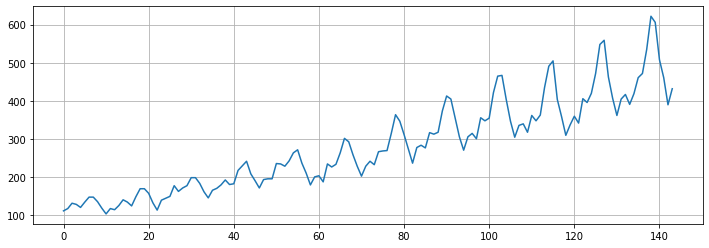

In [8]:
training_set = training_set.iloc[:,1:2].values # перевели dataframe в numpy.array

# plotting
plt.figure(figsize=(12, 4))
plt.plot(training_set, label = 'Airline Passangers Data')
plt.grid()
plt.show()

In [9]:
training_set.shape

(144, 1)

Обратите внимание, что мы, конечно можем подать в нейронную сеть такие данные, но тогда она будет анализировать y(t) от y(t-1) и не сможжет увидеть явно выраженную сезонность

### Скалирование данных

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler # проверить все

xScaler = MinMaxScaler()
training_data = xScaler.fit_transform(training_set)

### Формирование ансамблей данных

In [11]:
# функция создания "ансамблей" данных
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [12]:
# установка длины ансамбля. от нее практически всегда зависит точность предикта и быстродействие
seq_length = 8 # сравните 2 и 32
x, y = sliding_windows(training_data, seq_length)
x[0], y[0]

(array([[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208]]),
 array([0.06177606]))

Что мы сделали? Мы подали в нейронку ансамбль `ensemble` данных, в которых попросили ее найти зависимость y(t) от ансамбля данных y(t-1), ... y(t-seq_length)

In [13]:
# Разобьем на train и test

train_size = int(len(y) * 0.8)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

torch.Size([108, 8, 1]) torch.Size([108, 1]) torch.Size([27, 8, 1]) torch.Size([27, 1])


### LSTM Model
Ее преимущество при применении в нестационарных временных рядах заключается в способности выявления взаимосвязей данных внутри временных рядов и "автоматическое" выделение различных типов сезонности, тенденций изменений дисперсий, ковариации и проч характеристик временного ряда..

In [14]:
class LSTM(nn.Module):
    """
    num_classes :
    input_size  :
    hidden_size :
    num_layers  :
    
    """
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers  = num_layers
        self.input_size  = input_size
        self.hidden_size = hidden_size
        self.seq_length  = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True,
                            dropout = 0.4)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        
        return out

### Traning

In [15]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
# Сложность нейронки должна быть адекватна датасету !!!
hidden_size = seq_length # а можно попробовать 400 - в чем разница?
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

/Users/rudimiv/miniconda3/lib/python3.6/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Epoch: 0, loss: 0.10436
Epoch: 100, loss: 0.00446
Epoch: 200, loss: 0.00320
Epoch: 300, loss: 0.00243
Epoch: 400, loss: 0.00222
Epoch: 500, loss: 0.00205
Epoch: 600, loss: 0.00176
Epoch: 700, loss: 0.00135
Epoch: 800, loss: 0.00103
Epoch: 900, loss: 0.00086
Epoch: 1000, loss: 0.00082
Epoch: 1100, loss: 0.00080
Epoch: 1200, loss: 0.00079
Epoch: 1300, loss: 0.00077
Epoch: 1400, loss: 0.00075
Epoch: 1500, loss: 0.00073
Epoch: 1600, loss: 0.00070
Epoch: 1700, loss: 0.00068
Epoch: 1800, loss: 0.00065
Epoch: 1900, loss: 0.00066


### Testing

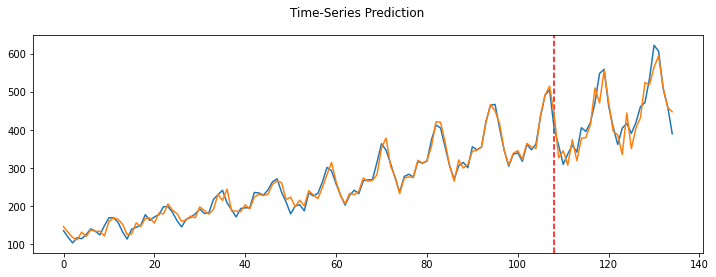

In [16]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = xScaler.inverse_transform(data_predict)
dataY_plot = xScaler.inverse_transform(dataY_plot)

# Ploitting
plt.figure(figsize=(12, 4))
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

### Выводы:
---
1. Использование LSTM слоев при прогнозировании нестационарных временных рядов - отличное решение, тк нейронка способна самостоятельно выденить динамики изменениях составляющих временного ряда. Правда, в более сложных случаях (трейдинге, например, или чтении и расшивровки волн мозга) приходится прибегать к feature ingineering
2. Сложость нейронной сети должна быть адекватна сложности подаваемых в нее данных. С ростом ансамбля и числа нейронов увеличивается заучивание тренировочной выборки и теряется способность к обощению
3. Предварительный анализ цикличности в данных (если она есть) помогает понять оптимальный размер ансамбля (тут видно, что цикл в среднем составляет 8 интервалов)
4. Также результат может зависеть от типа скалирования, который Вы применяете. Нужно знать принципы работы скаллеров и не стесняться экспериментировать с ними. См. статьи: [Data Preprocessing with Scikit-Learn: Standardization and Scaling](https://towardsdatascience.com/data-preprocessing-with-scikit-learn-standardization-and-scaling-cfb695280412) и [Gradient Descent, the Learning Rate, and the importance of Feature Scaling](https://towardsdatascience.com/gradient-descent-the-learning-rate-and-the-importance-of-feature-scaling-6c0b416596e1)
5. При всей выгодности приненении нейронных сетей, необходимо быть осторожным с автокорреляцией (см статью [Avoiding the pitfalls](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424))

## Подводя итоги

* Rnn allows a lot of flexibility in architecture design
* Vanilla RNNs are simple, but don't work very well
* Common to use LSTM or GRU: additive interaction improve gradient flow
* Backward flow of gradients in RNN are explode or vanish

exploding is controlled with gradient clipping

vanishing is controlled additive interactions (LSTM)

* * Better/simpler architectures are hot topic of current research 
* Better understanding (both theoretical and empirical) is needed

* Rnn обеспечивает большую гибкость в архитектурном проектировании
* Vanilla RNN намного проще, однако работают не очень хорошо
* LSTM или GRU: аддитивное взаимодействие улучшает градиентный поток
* Обратный поток градиентов в RNN делает explode или vanish

explode управляется с помощью градиентного отсечения

vanish - это контролируемые аддитивные взаимодействия (LSTM)

* Лучшие/более простые архитектуры являются актуальной темой текущих исследований
* Необходимо лучшее понимание (как теоретическое, так и эмпирическое)

## L13 Attention

### Sequence-to-Sequence with RNNs

* Сейчас мы пытаемся решить задачу sequence to sequence
* Орабатывая входную последовательность, мы хотим обобщить всю информацию, которая в ней содержится в некий вектор С
* Далее мы передаем этот вектор во вторую RNN, которая является декодером


Мы используем вектор С для передачи информации между энкодером и декодером, также мы предполагаем, что вектор С обощает всю информацию, которая небходима декодеру для генерации выходных последовательности.

Однако использование единственного вектора для предоставления информации может работать только для последовательностей малой длины (неразумно предполагать, что информация с длинной последовательностью можно сжать в один вектор) 

Именно поэтому нам нужен некий механизм, который будет обходить "бутылочное горлышко" и не сжимать всю информацию в один вектор С. 

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-011.png" width="700">

### Sequence-to-Sequence with RNNs and Attention mechanism

Давайте позволим нашему декодеру, используя context vector, фокусироваться на определенных выходах энкодера. 

Для этого будем вычислять context vector и вводим некую фцию $F_{att}$ , котрая будет на каждом шаге вычислять alignment score (функцию похожести) между внутренними состояниями декодера и энкодера.

После этого, вычисленные alignment scores мы пропускаем через softmax для нормализации. Таким образом мы получаем веса, которые говорят о том, насколько сильно мы хотим сфокусироваться на соответствующим им выходам энкодера.

Затем мы просто берем взевенную сумму внутренних состояний энкодера и передаем ее на вход декодеру. Данный алгоритм выполняем на каждом шаге декодера.

Функция $F_{att}$ может являться небольшой нейросетью или неким линейным преобразованием. Однако это не так важно, идея заключается в том, что мы не говорим явно на чем функция должна сосредотачиваться в конкретной задаче. Применив к ней back propagation, ее веса сами настроятся на необходимые точки фокусировки.

**То есть функция сама разберется на чем фокусироваться**



<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-017.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-020.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-021.png" width="700">

Давайте посмотрим как фокусировка работает на примере перевода с английского на французский 

Как мы знаем, на каждом шаге генерируется набор весов, которые отвечают за фокусировку на том или ином месте входной последовательности. Как мы видим, английское предложение имеет иной порядок слов относительно французского. Например, в английском варианте словосочетание **European Economic Area**, в то время как во французском **zone économique européenne**. 

В английском прилагательные идут перед существительным, в то время как во французском языке наоборот. 

Таким образом, благодаря гибкости модели, мы можем обрабатывать и учитывать разный порядок слов в разных языках.

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-025.png" width="700">

* Механизм внимания не обязательно должен принимать на вход последовательность. 

* Мы можем применять его, в том числе для генерации подписей для картинок. Входом в данном случае будет являться сетка признаков, которая была получена при применении сверточной сети к картинке. 

* Далее по этой сетке мы считаем веса внимания и делаем аналогично первому примеру.

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-028.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-031.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-036.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-037.png" width="700">



### Image Captioning with RNNs and Attention

Модели, основанные на внимании (attention) намного более продвинутые, нежели обычные нейросети. Они могут концентрироваться на отдельных частях изображения, что позволяет избежать зашумления данных.

Идея состоит в том, что свёрточная сеть теперь будет генерировать не один вектор, описывающий всё изображение, а набор векторов для нескольких участков исходного снимка. В дополнение к работе со словарём на каждом временном шаге модель также производит распределение по точкам на изображении, которые она обрабатывает в данный момент. Это позволяет ей научиться находить наиболее важные участки, на которых необходимо фокусироваться.

После обучения модели можно увидеть, что она как бы переносит своё внимание по изображению для каждого генерируемого слова.

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-038.png" width="700">

Существуют также понятия мягкого и жёсткого внимания (soft and hard attention). При мягком внимании мы берём взвешенную комбинацию признаков по всему изображению, тогда как в случае жёсткого внимания мы заставляем модель выбирать только один небольшой участок для обработки на каждом временном шаге. При этом жёсткое внимание, строго говоря, не является дифференцируемой функцией. Поэтому для обучения такой модели необходимо использовать более изощрённые приёмы, чем обычное обратное распространение ошибки.

Также нейросети, основанные на внимании, повсеместно используются для ответов на визуальные вопросы (Visual Question Answering). Цель этой задачи — обучить модель отвечать на вопрос по изображению. Например, она должна уметь не только называть сами объекты на фотографии, но и считать их, распознавать цвета и оценивать расположение относительно друг друга. Мы уже рассказывали о подобных архитектурах в статье о том, как такие нейросети могут помочь незрячим людям и о нейро-символическом мышлении.

* ссылка https://www.reg.ru/blog/nejroset-opisyvaet-mir-nezryachim-lyudyam/ 
* ссылка https://www.reg.ru/blog/uchim-nejroseti-rassuzhdat-o-tom-chto-oni-vidyat/

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-039.png" width="700">

### X, Attend, and Y

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-044.png" width="700">

### Attention Layer

Давайте обобщим наш attention слой.

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-045.png" width="700">

* Во-первых, заменим функцию $F_{att}$ на скалярное произведение.

* В предыдущем примере мы использовали только один вектор для поиска совпадений (query вектор), который являлся внутренним состоянием декодера. Давайте вместо этого дадим возможность нашей модели использовать сразу нессколько query-векторов. Благодаря этому мы будем получать несколько распределений весов на выходе (по 1 для каждого query-вектора).

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-048.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-050.png" width="700">


* Обратим внимание, что мы используем входной вектор Х дважды: при вычислении похожести с query-вектором и при вычислении конечного выходного взвешенного решения. Для большей гибкости давайте разделим их и будем отдельно вычислять key-вектора и отдельно value-вектора. key-вектора мы будем использовать для поиска схожести с value-векторами. А они в свою очередь, будут использоваться для вычисления конечного выходного взевешенного значения. 

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-056.png" width="700">

### Self-Attention Layer

Self-attention, также иногда называемый intra-attention - это механизм , связывающий различные позиции одной последовательности для **вычисления представления последовательности с учетом контекста**. 

Self-attention успешно используется в различных задачах, включая понимание прочитанного (reading comprehension), абстрактное обобщение, текстовое влечение (entailment) и обучение независимым от задачи представлениям предложений.

We know that word embeddings are vectors that represent the semantic meaning of a word. Words with similar meanings may have similar embeddings. However, in a sentence, the individual meanings of the words do not represent their meanings in the sentence. For example, if I had the phrase, Bank of a river, the embeddings of Bank and river individually mean completely different things, but they have a strong correlation in the sentence. Word embeddings without self-attention do not possess this sense of contextual information, so given the phrase above, a language model would have a low chance of predicting river. In order to address this problem, the self-attention block was proposed in the paper Attention is all you need as part of the original transformer architecture.

A self-attention module works by comparing every word in the sentence to every other word in the sentence, including itself, and reweighing the word embeddings of each word to include contextual relevance. It takes in n word embeddings without context and returns n word embeddings with contextual information. For example, in the phrase, Bank of the river, Bank would be compared with Bank, of, the, and river, and as Bank is compared with those four words, its word embedding would be reweighted to include the relevance of the words to its own meaning in the sentence accordingly.

Возникает вопрос, как это сделать наилучшим образом. 

Допустим, при обработке временных рядов используют некую сглаживающую функцию, например gaussian. 

Однако при обработке предложений очевидно, что неправильно считать рядом стоящие слова как наиболее близкие
друг к другу по контексту.

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/l08_4-1.png" width="700">

by https://www.youtube.com/watch?v=yGTUuEx3GkA&ab_channel=Rasa

Основная идея заключается в том, что мы рассчитываем и query, и input, и key на основе input-векторов. 

Таким образом мы будем сравнивать каждый наш входной вектор со всеми остальными входными векторами входного множества. 

Для расчета query-векторов мы добавляем матрицу $W_Q$

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-063.png" width="700">

Свой self attention инвариантен относительно порядка входных последовательностей. 

Таким образом мы получили новый тип слоев нейронной сети, который **не** использует информацию о порядке входной последовательности и оперирует только на множестве входных векторов.

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-070.png" width="700">

Иногда нам хочется чтобы порядок учитывался, например при переводе и генерации описания картинок (caption). 

Для этого мы добавляем информацию на входы о порядке наших элементов.

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-072.png" width="700">

### Masked Self-Attention Layer

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-073.png" width="700">

#### Multihead Self-Attention Layer

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/l08_7-1.png" width="700">



Давайте посмотрим на то, к каким словам предложения gave может иметь отношение. В общим случае глагол может иметь связку со многоми частями предложения. Как, например, к подлежащему, так и к причастиям.

В идеале, нам бы хотелось обратить внимние функции (attention) на все эти взаимосвязи.

**Для этого небходимо ввести несколько механизмов внимания, как это показано на картинке**

 <img src ="http://edunet.kea.su/repo/src/L08_RNN/img/l08_6-1.png" width="700"> 

* Чтобы осуществить задуманное, вместо одного набора query, будем использовать несколько независимых наборов. 

* Причем каждый набор будет считаться уникальной матрицей. 

* Аналогично сделаем для keys и values. Количество таких наборов внутри keys, queries, values должно быть **одинаковым**. 

* Обозначим это число как h - head, далее производим аналогичные манипуляции, при этом введем в параллель h таких функций attention
* На последнем шаге мы их соединяем (конкатинируем)

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-075.png" width="700">

### Three Ways of Processing Sequences

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/l08_1_1.png" width="700">


Модель attention позволяет обрабатывать последовательности параллельно в отличие от моделей основанных на RNN, это позволяет данную модель в большей мере использовать возможности использования параллельных вычислений на GPU 

RNN:
**Преимущества** 

• Возможность обработки входных данных любой длины

• Размер модели не увеличивается с размером входного сигнала

• Расчет учитывает историческую информацию

• Веса распределяются во времени 

**Недостатки**

• Вычисление происходит медленно

• Трудность доступа к информации, полученной давным-давно

• Не может учитывать какие-либо будущие входные данные для текущего состояния

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-084.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-085.png" width="700">

### The Transformer

Раньше мы передавали информацию по из блока attention в RNN для ее последующего применения, однако в 2017 году вышла статья под названием Attention is all you need. В ней говорилось о том, что для обработки последовательностей можно ограничиться только блоком внимания. Данная модель получила название Transformer. 

По сути это базовый блок, который основывается только на self-attention при работе с входными векорами. 

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-092.png" width="700">

Блок устроен следующим образом: входные вектора мы запускаем в блок self-attention и используем residual connection как обходной путь вокруг self-attention, затем мы их складываем. 

После - применяем слой нормализации, затем - слой feed forward сетей, плюс обходной путь вокруг feat forward. 

Складываем их и выполняем нормализацию. 

Это один блок-трансформер. 

В реальных моделях эти слои стекируют друг с другом и получается большая трансформер-модель. 

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-094.png" width="700">

Although this achieves parallelization, it is still computationally expensive. The number of operations per layer incurred by RNNs and CNNs is way more unreasonable as compared to the quality of results they offer. The original Transformer paper has put forth a comparison of these parameters for the competent models:

Хотя таким образом (свертками) достигается распараллеливание, однако это вычислительно дорого. Количество операций на слой, выполняемых RNN и CNN, гораздо более необоснованно по сравнению с качеством результатов, которые они предлагают.

В одной из статей про Трансформеры было предложено сравнение этих параметров для компетентных моделей:

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/L08_trans.png" width="700">

Here, d (or d_model) is the representation dimension or embedding dimension of a word (usually in the range 128–512), n is the sequence length (usually in the range 40–70), k is the kernel size of the convolution and r is the attention window-size for restricted self-attention. From the table, we can infer the following:

* Clearly, the per-layer computational complexity of self-attention is way less than that of others.
* With respect to sequential operations, except RNNs, all other approaches offer parallelization, hence their complexity is O(1).
* The final metric is maximum path length, which superficially means the complexity for attending long-term dependencies or distant words. Since convolutional models use hierarchical representations, their complexity is nlog(n), while self-attention models attend all the words at the same step, hence their complexity is O(1).


The Transformer uses the self-attention mechanism where attention weights are calculated using all the words in the input sequence at once, hence it facilitates parallelization. In addition to that, since the per-layer operations in the Transformer are among words of the same sequence, the complexity does not exceed O(n²d). Hence, the transformer proves to be effective (since it uses attention) and at the same time, a computationally efficient model.

Здесь d (или *d_model*) - размер выборки или embedding вложения слова (обычно в диапазоне 128-512), n-длина последовательности (обычно в диапазоне 40-70), k-размер ядра свертки, а r-размер окна внимания для ограниченного self-attention. Из таблицы мы можем сделать следующие выводы:

* Очевидно, что вычислительная сложность каждого слоя self-attention намного меньше, чем у других.
* Что касается последовательных операций, то, за исключением RNN, все другие подходы предлагают параллельность действий, поэтому их сложность составляет O(1).
* Конечная метрика - максимальная длина пути, которая поверхностно означает сложность для посещения долгосрочных зависимостей или отдаленных слов. Поскольку сверточные модели используют иерархические представления, их сложность равна nlog(n), в то время как модели самосознания посещают все слова на одном и том же шаге, следовательно, их сложность равна O(1).


Трансформер использует механизм само-внимания, где веса внимания вычисляются с использованием всех слов во входной последовательности сразу, следовательно, это облегчает распараллеливание. Кроме того, поскольку операции на каждом слое в трансформерах относятся к словам одной и той же последовательности, сложность не превышает O($n^2d$). Следовательно, трансформер оказывается эффективной (поскольку она использует attention) и в то же время вычислительно качественной моделью.

статья: https://towardsdatascience.com/transformers-explained-65454c0f3fa7

### The Transformer: Transfer Learning

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-095.png" width="700">

В 2020 практически все успехи машинного обучения были связаны с применением трансформеров. На сегодняшний день - это самая передовая модель для обработки последовательностей. 

Стоит отметить, что модели трансформеров имеют огромное кличество параметров, как следствие - требуются большие вычислительные мощности для их обучения. В связи с этим, обучение данных моделей с нуля, преимущественно доступны только развитым государствам и крупным компаниям. 

Большая часть предприятий может расчитывать только на дообучене этих моделей для своих задач, что все равно показывает хорошие результаты.

### The Transformer: Transfer Learning

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-100.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-104.png" width="700">

### Summary

<img src ="http://edunet.kea.su/repo/src/L08_RNN/img/498_FA2019_lecture13-105.png" width="700">